In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('crimes')

In [3]:
end2end_model = end2end.train_model(x_train, y_train, n_epoch = 1000, num_models = 5, hidden_layers = [50, 50], learning_rate = 0.001, tanh = True, calibration_threshold = .03, exp_decay = .998)

initial loss:  -0.1943320333957672
501 0.05957822222222217 tensor(-5.1610, grad_fn=<MeanBackward0>) tensor(0.0441, grad_fn=<SumBackward1>)
502 0.043081333333333374 tensor(-5.1531, grad_fn=<MeanBackward0>) tensor(0.0420, grad_fn=<SumBackward1>)
503 0.07505244444444442 tensor(-5.1390, grad_fn=<MeanBackward0>) tensor(0.0456, grad_fn=<SumBackward1>)
504 0.04770222222222225 tensor(-5.1468, grad_fn=<MeanBackward0>) tensor(0.0425, grad_fn=<SumBackward1>)
505 0.07107777777777775 tensor(-5.1515, grad_fn=<MeanBackward0>) tensor(0.0451, grad_fn=<SumBackward1>)
506 0.03939733333333335 tensor(-5.1695, grad_fn=<MeanBackward0>) tensor(0.0417, grad_fn=<SumBackward1>)
507 0.055551555555555535 tensor(-5.1797, grad_fn=<MeanBackward0>) tensor(0.0437, grad_fn=<SumBackward1>)
509 0.04358844444444442 tensor(-5.2006, grad_fn=<MeanBackward0>) tensor(0.0427, grad_fn=<SumBackward1>)
511 0.04403644444444443 tensor(-5.2038, grad_fn=<MeanBackward0>) tensor(0.0426, grad_fn=<SumBackward1>)
513 0.048856444444444425 te

637 0.032780444444444425 tensor(-5.3784, grad_fn=<MeanBackward0>) tensor(0.0417, grad_fn=<SumBackward1>)
639 0.030289777777777756 tensor(-5.3964, grad_fn=<MeanBackward0>) tensor(0.0414, grad_fn=<SumBackward1>)
645 0.03290222222222221 tensor(-5.4118, grad_fn=<MeanBackward0>) tensor(0.0419, grad_fn=<SumBackward1>)
647 0.051222222222222204 tensor(-5.3706, grad_fn=<MeanBackward0>) tensor(0.0436, grad_fn=<SumBackward1>)
648 0.0441048888888889 tensor(-5.3583, grad_fn=<MeanBackward0>) tensor(0.0424, grad_fn=<SumBackward1>)
649 0.0628373333333333 tensor(-5.3493, grad_fn=<MeanBackward0>) tensor(0.0446, grad_fn=<SumBackward1>)
650 0.03804888888888891 tensor(-5.3756, grad_fn=<MeanBackward0>) tensor(0.0419, grad_fn=<SumBackward1>)
651 0.0427551111111111 tensor(-5.3923, grad_fn=<MeanBackward0>) tensor(0.0428, grad_fn=<SumBackward1>)
661 0.032563555555555526 tensor(-5.4193, grad_fn=<MeanBackward0>) tensor(0.0417, grad_fn=<SumBackward1>)
663 0.03562222222222221 tensor(-5.4173, grad_fn=<MeanBackward0>

End2end test MAPE:  0.62888837


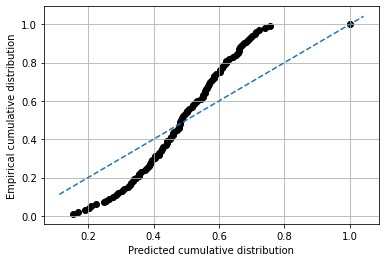

End2end test calibration error when step size is 0.001:  20.585056764273872
End2end test calibration error when step size is 0.01:  2.0351836666680385
End2end test calibration error when step size is 0.1:  0.16754995906175302


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

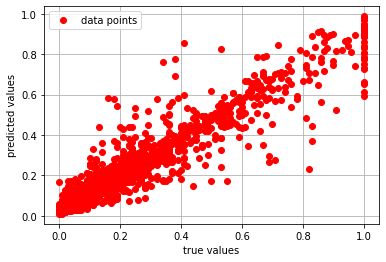

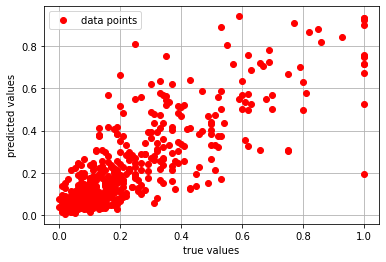

In [5]:
plt.plot(y_train.detach().numpy(), end2end_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()